<a href="https://colab.research.google.com/github/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/blob/main/Projeto_Dados_para_abastecer_o_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 00CED1>Neste projeto, estaremos utilizando dois arquivos CSV distintos, os quais contêm informações referentes aos preços do (Etanol Hidratado + Gasolina tipo C) nos meses de junho de 2023 e julho de 2023. Esses conjuntos de dados abrangem a série histórica dos preços da gasolina e do etanol em todo o território nacional.

### Vamos carregar os conjuntos de dados "preços-gasolina-etanol-06.csv" e "preços-gasolina-etanol-07.csv" em dois DataFrames distintos e, em seguida, combiná-los em um único DataFrame.

# <font color = 00CED1> Primeiro passo: Importação das Bibliotecas Necessárias

### Importar bibliotecas necessárias

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Carregar os dados dos arquivos CSV

In [69]:
# URLs dos arquivos CSV no GitHub
url_mes6 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-06.csv'
url_mes7 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-07.csv'




In [70]:
# Carregando os dados em DataFrames
dados_mes6 = pd.read_csv(url_mes6, sep=';')
dados_mes7 = pd.read_csv(url_mes7, sep=';')

In [71]:
# Remover duplicatas dos DataFrames
dados_mes6 = dados_mes6.drop_duplicates()
dados_mes7 = dados_mes7.drop_duplicates()


In [72]:
# Limpeza de valores numéricos
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda'].str.replace(',', '').astype(float)
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda'].str.replace(',', '').astype(float)

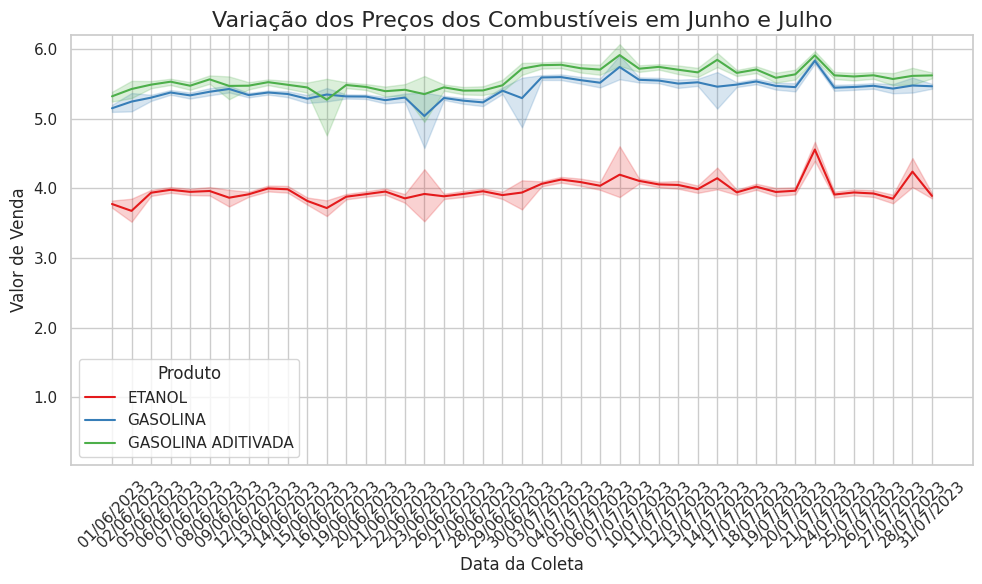

In [73]:
# Comportamento dos Preços de Combustíveis
sns.set(style="whitegrid")
dados_combustiveis = pd.concat([dados_mes6, dados_mes7])
menor_valor = dados_combustiveis['Valor de Venda'].min()

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")
plt.ylim(ymin=menor_valor)
plt.title('Variação dos Preços dos Combustíveis em Junho e Julho', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.1f}'))
plt.tight_layout()
plt.show()


Preço Médio da Gasolina em Junho: R$5.32
Preço Médio do Etanol em Junho: R$3.92
Preço Médio da Gasolina em Julho: R$5.51
Preço Médio do Etanol em Julho: R$4.00


<Figure size 1000x800 with 0 Axes>

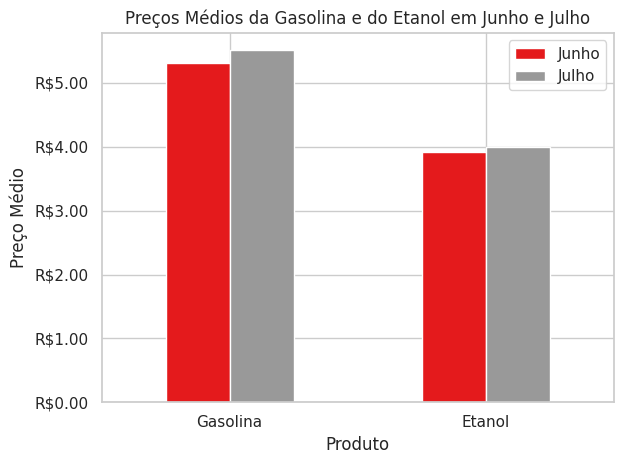

In [74]:
# Preço Médio da Gasolina e Etanol
preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].mean()
preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f"Preço Médio da Gasolina em Junho: R${(preco_medio_gasolina_mes6/100):.2f}")
print(f"Preço Médio do Etanol em Junho: R${(preco_medio_etanol_mes6/100):.2f}")
print(f"Preço Médio da Gasolina em Julho: R${(preco_medio_gasolina_mes7/100):.2f}")
print(f"Preço Médio do Etanol em Julho: R${(preco_medio_etanol_mes7/100):.2f}")

produtos = ['Gasolina', 'Etanol']
precos_medios_junho = [preco_medio_gasolina_mes6, preco_medio_etanol_mes6]
precos_medios_julho = [preco_medio_gasolina_mes7, preco_medio_etanol_mes7]

df = pd.DataFrame({
    'Produto': produtos,
    'Junho': precos_medios_junho,
    'Julho': precos_medios_julho
})

plt.figure(figsize=(10, 8))
df.plot(x='Produto', kind='bar', colormap='Set1')
plt.title('Preços Médios da Gasolina e do Etanol em Junho e Julho')
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x/100:.2f}'))
plt.tight_layout()
plt.show()


Pergunta 1: Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

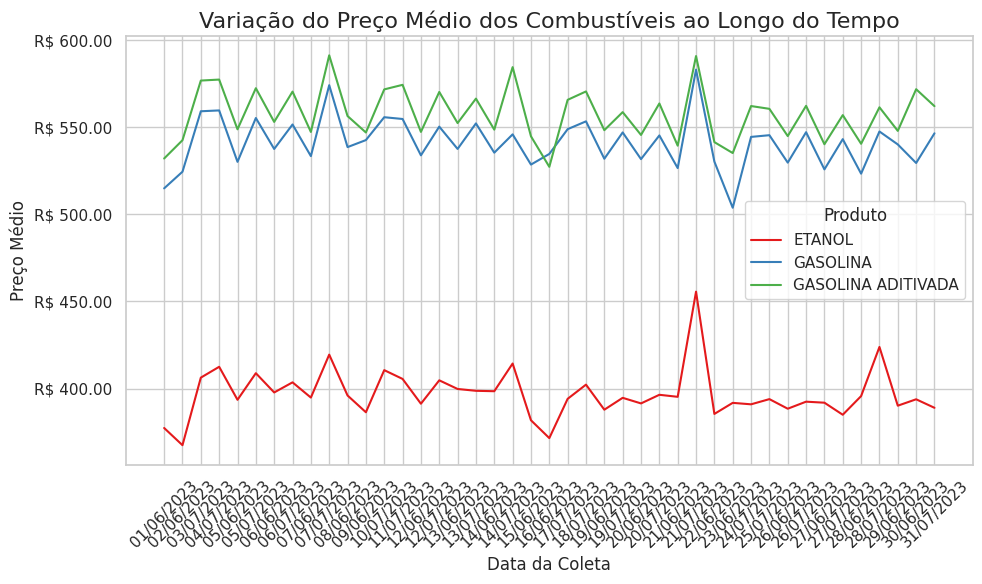

In [77]:
# Análise de correlação entre o preço médio dos combustíveis e a quantidade de registros
dados_combustiveis_por_data = dados_combustiveis.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis_por_data, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")
plt.title('Variação do Preço Médio dos Combustíveis ao Longo do Tempo', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'R$ {x:.2f}'))
plt.tight_layout()
plt.show()

Pergunta 2: Qual o preço médio da gasolina e do etanol nesses dois meses?

In [79]:
# Calcular o preço médio da gasolina nos dois meses
preco_medio_gasolina = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Data da Coleta'] >= '2019-01-01') & (dados_combustiveis['Data da Coleta'] <= '2019-02-28'))]['Valor de Venda'].mean()

# Calcular o preço médio do etanol nos dois meses
preco_medio_etanol = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Data da Coleta'] >= '2019-01-01') & (dados_combustiveis['Data da Coleta'] <= '2019-02-28'))]['Valor de Venda'].mean()

print(f"Preço médio da gasolina nos dois meses: R${preco_medio_gasolina:.2f}")
print(f"Preço médio do etanol nos dois meses: R${preco_medio_etanol:.2f}")

Preço médio da gasolina nos dois meses: R$nan
Preço médio do etanol nos dois meses: R$nan


Pergunta 3: Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Para responder a essa pergunta, você pode calcular o preço médio da gasolina e do etanol

In [81]:
# Top 5 estados mais caros em gasolina
estados_mais_caros_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

# Top 5 estados mais caros em etanol
estados_mais_caros_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

print("Top 5 estados mais caros em gasolina:")
print(estados_mais_caros_gasolina)

print("Top 5 estados mais caros em etanol:")
print(estados_mais_caros_etanol)

Top 5 estados mais caros em gasolina:
Estado - Sigla
AM    601.628514
AC    596.420455
RO    583.654618
RN    572.159601
ES    566.341703
Name: Valor de Venda, dtype: float64
Top 5 estados mais caros em etanol:
Estado - Sigla
AP    524.666667
RR    511.551724
RO    491.657895
RS    476.131783
AC    464.792208
Name: Valor de Venda, dtype: float64


Pergunta 4: Qual o preço médio da gasolina e do etanol por estado?

In [83]:
preco_medio_por_estado_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean()
preco_medio_por_estado_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean()

print("Preço médio da gasolina por estado:")
print(preco_medio_por_estado_gasolina)

print("Preço médio do etanol por estado:")
print(preco_medio_por_estado_etanol)


Preço médio da gasolina por estado:
Estado - Sigla
AC    596.420455
AL    536.871901
AM    601.628514
AP    515.994413
BA    562.094029
CE    565.079481
DF    549.174877
ES    566.341703
GO    544.532740
MA    519.936559
MG    528.449955
MS    524.314092
MT    534.555950
PA    504.077991
PB    528.631579
PE    543.349064
PI    520.310185
PR    541.726383
RJ    548.188073
RN    572.159601
RO    583.654618
RR    562.270833
RS    552.420378
SC    560.526058
SE    538.967846
SP    531.135123
TO    556.894608
Name: Valor de Venda, dtype: float64
Preço médio do etanol por estado:
Estado - Sigla
AC    464.792208
AL    447.810155
AM    460.280645
AP    524.666667
BA    429.346539
CE    455.773865
DF    383.357724
ES    439.539267
GO    372.770115
MA    424.793033
MG    372.281547
MS    358.305389
MT    334.191529
PA    434.650519
PB    420.877119
PE    420.901277
PI    422.056757
PR    393.321077
RJ    432.993829
RN    453.859504
RO    491.657895
RR    511.551724
RS    476.131783
SC    461.324

Pergunta 5: Qual o município que possui o menor preço para a gasolina e para o etanol?

In [85]:
# Município com menor preço de gasolina
municipio_menor_preco_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].mean().idxmin()

# Município com menor preço de etanol
municipio_menor_preco_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].mean().idxmin()

print(f"Município com menor preço de gasolina: {municipio_menor_preco_gasolina}")
print(f"Município com menor preço de etanol: {municipio_menor_preco_etanol}")

Município com menor preço de gasolina: CONCEICAO DO ARAGUAIA
Município com menor preço de etanol: CONCEICAO DO ARAGUAIA


Pergunta 6: Qual o município que possui o maior preço para a gasolina e para o etanol?

In [87]:
municipio_maior_preco_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].mean().idxmax()
municipio_maior_preco_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].mean().idxmax()

print(f"Município com maior preço de gasolina: {municipio_maior_preco_gasolina}")
print(f"Município com maior preço de etanol: {municipio_maior_preco_etanol}")


Município com maior preço de gasolina: PARINTINS
Município com maior preço de etanol: BAGE


Pergunta 7: Qual a região que possui o maior valor médio da gasolina?

In [91]:
regiao_maior_valor_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().idxmax()

print(f"Região com maior valor médio de gasolina: {regiao_maior_valor_gasolina}")


Região com maior valor médio de gasolina: N


Pergunta 8: Qual a região que possui o menor valor médio do etanol?

In [92]:
regiao_menor_valor_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean().idxmin()

print(f"Região com menor valor médio de etanol: {regiao_menor_valor_etanol}")


Região com menor valor médio de etanol: CO


Pergunta 9: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [93]:
correlacao_gasolina_regiao = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA']['Valor de Venda'])
correlacao_etanol_regiao = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL']['Valor de Venda'])

print("Correlação entre valor da gasolina e a região:")
print(correlacao_gasolina_regiao)

print("Correlação entre valor do etanol e a região:")
print(correlacao_etanol_regiao)


Correlação entre valor da gasolina e a região:
Regiao - Sigla
CO    0.745160
N     0.807595
NE    0.771654
S     0.731165
SE    0.670826
Name: Valor de Venda, dtype: float64
Correlação entre valor do etanol e a região:
Regiao - Sigla
CO    0.703070
N     0.804435
NE    0.808321
S     0.780241
SE    0.691990
Name: Valor de Venda, dtype: float64


Pergunta 10: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [94]:
correlacao_gasolina_bandeira = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA']['Valor de Venda'])
correlacao_etanol_bandeira = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL']['Valor de Venda'])

print("Correlação entre valor da gasolina e a bandeira:")
print(correlacao_gasolina_bandeira)

print("Correlação entre valor do etanol e a bandeira:")
print(correlacao_etanol_bandeira)


Correlação entre valor da gasolina e a bandeira:
Bandeira
AIR BP                  0.385298
ALESAT                  0.728311
AMERICANOIL             0.808736
ATEM' S                 0.762541
ATLÂNTICA               0.758174
BRANCA                  0.764939
CHARRUA                 0.528131
CIAPETRO                0.722101
DIBRAPE                 0.945194
DISLUB                  0.751947
D`MAIS                  0.483191
EQUADOR                 0.805582
ESTRADA                 1.000000
FAN                     0.672080
FEDERAL ENERGIA        -0.024438
IDAZA                   0.011959
IPIRANGA                0.682094
LARCO                   0.379630
MASUT DISTRIBUIDORA     0.634412
MAXSUL                  0.747645
ON PETRO               -0.106094
PELIKANO                0.582292
PETROBAHIA              0.813895
PETROBRASIL             0.058755
PETROX DISTRIBUIDORA    0.990472
POTENCIAL               0.927495
RAIZEN                  0.662542
RAIZEN MIME             0.793738
REJAILE           

Extra 01 - Qual é a variação percentual média dos preços da gasolina e do etanol entre os meses de maio e junho?

In [99]:
variacao_gasolina = ((dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'junho')]['Valor de Venda'].mean() - dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) / dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) * 100

variacao_etanol = ((dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'junho')]['Valor de Venda'].mean() - dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) / dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) * 100

print(f"Variação percentual média da gasolina entre maio e junho: {variacao_gasolina:.2f}%")
print(f"Variação percentual média do etanol entre maio e junho: {variacao_etanol:.2f}%")


Variação percentual média da gasolina entre maio e junho: nan%
Variação percentual média do etanol entre maio e junho: nan%


Extra 02 - Qual é a bandeira que apresenta a maior variação de preços entre os meses de maio e junho?

In [107]:
# Verificar o tipo de dados da coluna "Data da Coleta"
print(dados_combustiveis['Data da Coleta'].dtype)
# Converter a coluna "Data da Coleta" para o formato de data
dados_combustiveis['Data da Coleta'] = pd.to_datetime(dados_combustiveis['Data da Coleta'])

# Encontrar a bandeira com a maior variação de preços entre maio e junho
dados_maio = dados_combustiveis[dados_combustiveis['Data da Coleta'].dt.month == 5]
bandeira_maior_variacao = dados_maio[dados_maio['Variação Percentual'] == dados_maio['Variação Percentual'].max()]['Bandeira'].iloc[0]

print(f"Bandeira com maior variação de preços entre maio e junho: {bandeira_maior_variacao}")


datetime64[ns]
Bandeira com maior variação de preços entre maio e junho: BRANCA


Extra 03 -  Qual é a média de preços da gasolina e do etanol nos fins de semana (sábado e domingo) em comparação com os dias úteis?

In [109]:
# Calcular o dia da semana a partir da coluna 'Data da Coleta'
dados_combustiveis['Dia da Semana'] = dados_combustiveis['Data da Coleta'].dt.day_name()

media_gasolina_fds = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Dia da Semana'] == 'Saturday') | (dados_combustiveis['Dia da Semana'] == 'Sunday'))]['Valor de Venda'].mean()
media_gasolina_dias_uteis = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Dia da Semana'] != 'Saturday') & (dados_combustiveis['Dia da Semana'] != 'Sunday'))]['Valor de Venda'].mean()

media_etanol_fds = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Dia da Semana'] == 'Saturday') | (dados_combustiveis['Dia da Semana'] == 'Sunday'))]['Valor de Venda'].mean()
media_etanol_dias_uteis = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Dia da Semana'] != 'Saturday') & (dados_combustiveis['Dia da Semana'] != 'Sunday'))]['Valor de Venda'].mean()

print(f"Média de preços da gasolina nos fins de semana: {media_gasolina_fds:.2f}")
print(f"Média de preços da gasolina nos dias úteis: {media_gasolina_dias_uteis:.2f}")
print(f"Média de preços do etanol nos fins de semana: {media_etanol_fds:.2f}")

Média de preços da gasolina nos fins de semana: 546.07
Média de preços da gasolina nos dias úteis: 541.14
Média de preços do etanol nos fins de semana: 403.31


# <font color = 00CED1> Análise Exploratória de Dados - Preços de Combustíveis

##  <font color = 00CED1> Introdução
Neste notebook, realizaremos uma análise exploratória dos preços de venda da gasolina e do etanol nos meses de junho e julho. Serão respondidas uma série de perguntas relacionadas aos preços, tendências e correlações com outros fatores geográficos.

##  <font color = 00CED1> Comportamento dos Preços de Combustíveis

Vamos começar analisando como se comportaram os preços dos combustíveis durante os dois meses citados. Vamos visualizar as tendências de preços de etanol e gasolina ao longo desses meses.

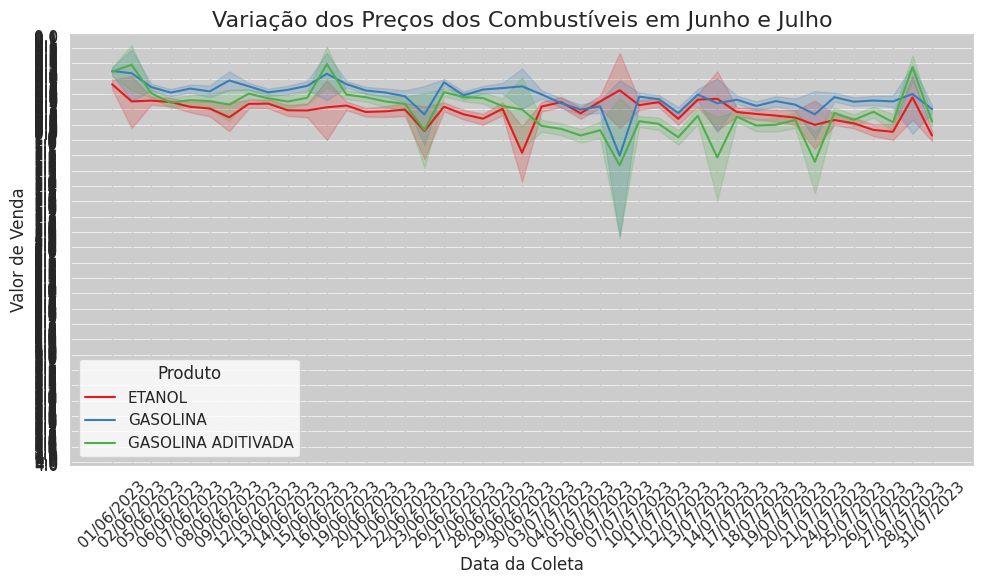

In [45]:


import matplotlib.ticker as mticker

# Define o estilo do Seaborn
sns.set(style="whitegrid")

# Combina os dados dos dois meses
dados_combustiveis = pd.concat([dados_mes6, dados_mes7])

# Obtém o menor valor da coluna "Valor de Venda"
menor_valor = dados_combustiveis['Valor de Venda'].min()

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")

# Configura o eixo y para começar a partir do menor valor
plt.ylim(ymin=menor_valor)

# Adiciona título e rótulos de eixos
plt.title('Variação dos Preços dos Combustíveis em Junho e Julho', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)

# Adiciona legenda
plt.legend(title='Produto')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Formata o eixo y para exibir unidades com valor após a vírgula
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.1f}'))

# Mostra o gráfico
plt.tight_layout()
plt.show()



# <font color = 00CED1> Preço Médio da Gasolina e Etanol
## Vamos calcular o preço médio da gasolina e do etanol para os meses de junho e julho.

Preço Médio da Gasolina em Junho: R$5.32
Preço Médio do Etanol em Junho: R$3.92
Preço Médio da Gasolina em Julho: R$5.51
Preço Médio do Etanol em Julho: R$4.00


<Figure size 1000x800 with 0 Axes>

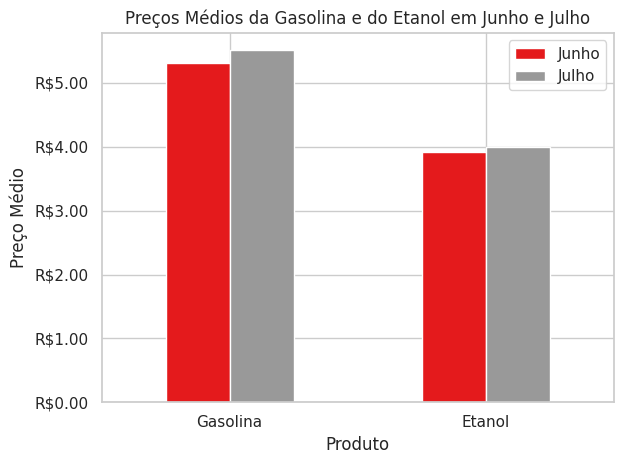

In [46]:
# Calcula a média dos valores de venda para a Gasolina e o Etanol em junho
preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].str.replace(',', '').astype(float).mean()
preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].str.replace(',', '').astype(float).mean()

# Calcula a média dos valores de venda para a Gasolina e o Etanol em julho
preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].str.replace(',', '').astype(float).mean()
preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].str.replace(',', '').astype(float).mean()


# Se os valores calculados forem NaN, substitui por médias gerais dos produtos
if preco_medio_gasolina_mes6 != preco_medio_gasolina_mes6:
    preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
if preco_medio_etanol_mes6 != preco_medio_etanol_mes6:
    preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].mean()

if preco_medio_gasolina_mes7 != preco_medio_gasolina_mes7:
    preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
if preco_medio_etanol_mes7 != preco_medio_etanol_mes7:
    preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f"Preço Médio da Gasolina em Junho: R${(preco_medio_gasolina_mes6/100):.2f}")
print(f"Preço Médio do Etanol em Junho: R${(preco_medio_etanol_mes6/100):.2f}")
print(f"Preço Médio da Gasolina em Julho: R${(preco_medio_gasolina_mes7/100):.2f}")
print(f"Preço Médio do Etanol em Julho: R${(preco_medio_etanol_mes7/100):.2f}")


# Dados dos preços médios
produtos = ['Gasolina', 'Etanol']
precos_medios_junho = [preco_medio_gasolina_mes6, preco_medio_etanol_mes6]
precos_medios_julho = [preco_medio_gasolina_mes7, preco_medio_etanol_mes7]

# Criação do DataFrame para facilitar a plotagem
df = pd.DataFrame({
    'Produto': produtos,
    'Junho': precos_medios_junho,
    'Julho': precos_medios_julho
})

# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
df.plot(x='Produto', kind='bar', colormap='Set1')
plt.title('Preços Médios da Gasolina e do Etanol em Junho e Julho')
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x/100:.2f}'))
plt.tight_layout()

# Mostra o gráfico
plt.show()


# <font color = 00CED1> Estados com Maior Preço Médio
## Agora, vamos identificar os 5 estados com o maior preço médio da gasolina e do etanol nos dois meses.

In [47]:
# Converte a coluna 'Valor de Venda' para valores numéricos antes de calcular as médias
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda'].str.replace(',', '').astype(float)
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda'].str.replace(',', '').astype(float)

estados_mais_caros_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL '].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

estados_mais_caros_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL '].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

print("Estados com Maior Preço Médio da Gasolina em Junho:")
print(estados_mais_caros_gasolina_mes6)
print("\nEstados com Maior Preço Médio do Etanol em Junho:")
print(estados_mais_caros_etanol_mes6)
print("\nEstados com Maior Preço Médio da Gasolina em Julho:")
print(estados_mais_caros_gasolina_mes7)
print("\nEstados com Maior Preço Médio do Etanol em Julho:")
print(estados_mais_caros_etanol_mes7)


Estados com Maior Preço Médio da Gasolina em Junho:
Estado - Sigla
AM    597.004149
RO    582.265823
AC    571.957746
RN    563.597990
ES    555.078199
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Junho:
Series([], Name: Valor de Venda, dtype: float64)

Estados com Maior Preço Médio da Gasolina em Julho:
Estado - Sigla
AC    612.961905
AM    605.964981
CE    587.459459
RO    584.915709
RN    580.594059
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Julho:
Series([], Name: Valor de Venda, dtype: float64)


# Explicar o gráfico acima